<a href="https://colab.research.google.com/github/kerenalli/Neural-Nets/blob/main/20210203_FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/hankarmostafa/fraud-detection-using-ml-and-auto-ml

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

https://machinelearningmastery.com/autoencoder-for-regression/

https://machinelearningmastery.com/?s=autoencoder&post_type=post&submit=Search

https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/

In [3]:
!pip install pycaret

     |████████████████████████████████| 256kB 4.1MB/s 
     |████████████████████████████████| 174kB 43.8MB/s 
     |████████████████████████████████| 157.5MB 86kB/s 
     |████████████████████████████████| 14.2MB 52.5MB/s 
     |████████████████████████████████| 1.6MB 46.4MB/s 
     |████████████████████████████████| 245kB 40.3MB/s 
     |████████████████████████████████| 276kB 45.6MB/s 
     |████████████████████████████████| 102kB 10.4MB/s 
     |████████████████████████████████| 65.8MB 57kB/s 
     |████████████████████████████████| 6.8MB 44.9MB/s 
     |████████████████████████████████| 1.8MB 48.2MB/s 
     |████████████████████████████████| 163kB 49.6MB/s 
     |████████████████████████████████| 348kB 56.4MB/s 
     |████████████████████████████████| 81kB 9.0MB/s 
     |████████████████████████████████| 153kB 48.4MB/s 
     |████████████████████████████████| 1.1MB 37.8MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 81kB 8.9MB/s 

In [6]:
!pip install tpot

     |████████████████████████████████| 92kB 2.9MB/s 
     |████████████████████████████████| 163kB 4.9MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11957 sha256=d268f42b8c4652f1843778c0d2af3a7d1a789757f019d284a794a3a6395e51b2
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit


In [7]:

import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 
from pycaret.datasets import get_data
from tpot import TPOTClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from pycaret.classification import *
from sklearn.metrics import classification_report, accuracy_score,f1_score 
from sklearn.metrics import precision_score, recall_score,confusion_matrix 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
print(os.listdir('/content/drive/MyDrive/Classification/'))

['creditcard.csv', 'v_data', 'Videos', 'mo_data', '.ipynb_checkpoints', 'heart_failure_clinical_records_dataset.csv', 'diabetes.csv', 'dia.csv']


In [8]:
# getting data 
data=pd.read_csv('/content/drive/MyDrive/Classification//creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [11]:
#separate data values per class 
fraud=data[data.Class==1]
nonfraud=data[data.Class==0]
per_fraud=round(len(fraud)/len(data)*100,2)
per_nonfraud=round(len(nonfraud)/len(data)*100,2)
print(f'Percentage of Fraud transactions is : {per_fraud} %')
print('---------')
print(f'Percentage of Non Fraud transactions is : {per_nonfraud} %')

Percentage of Fraud transactions is : 0.17 %
---------
Percentage of Non Fraud transactions is : 99.83 %


In [12]:
#Mention that : 1 = Fradulent and 0 = not Fradulent
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0.5, 1.0, 'Number of Transactions per Class')

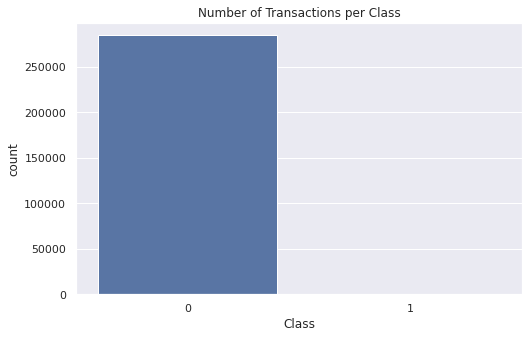

In [13]:
sb.set_style('whitegrid')
sb.set(rc={'figure.figsize':(8,5)})
sb.countplot(x='Class',data=data).set_title('Number of Transactions per Class')

In [14]:
print('Amount Details of Fraudulent Transactions :\n',fraud.Amount.describe())
print('**********')
print('Amount Details of Valid Transactions :\n',nonfraud.Amount.describe())

Amount Details of Fraudulent Transactions :
 count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
**********
Amount Details of Valid Transactions :
 count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


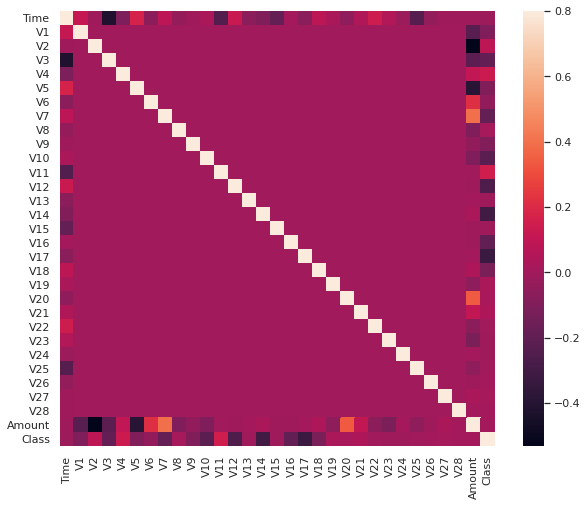

In [15]:
# Correlation matrix 
corrmatrix = data.corr() 
fig = plt.figure(figsize = (10, 8)) 
sb.heatmap(corrmatrix, vmax = .8, square = True) 
plt.show() 

In [16]:
# splitting data into  X features  and  y target 
X = data.drop(['Class'], axis = 1) 
y = data["Class"] 
print('X: Features || y:Class Labels: \n')
print(X.shape,y.shape) 
# Converting to arrays   
X = X.values 
y = y.values 
# Split the data into training set and testing set 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 42) 
print('After Splitting : \n')
X_train.shape,X_test.shape,y_train.shape,y_test.shape

X: Features || y:Class Labels: 

(284807, 30) (284807,)
After Splitting : 



((227845, 30), (56962, 30), (227845,), (56962,))

In [17]:
# Building the Random Forest Classifier (RANDOM FOREST) 
rfc = RandomForestClassifier() 
rfc.fit(X_train, y_train) 
# predictions 
rfc_preds = rfc.predict(X_test) 

In [18]:
#DEFINE A HELPER FUNCTION TO SHOW EVALUATION METRICS 
def evaluate(y_test,preds):
    print('****EVALUATIONS METRICS****')
    accuracy = round(accuracy_score(y_test, preds),2)
    print("Accuracy == {}".format(accuracy)) 
    #precision
    precision = round(precision_score(y_test, preds),2)
    print("Precision == {}".format(precision)) 
    #recall
    recall = round(recall_score(y_test, preds),2)
    print("Recall == {}".format(recall)) 
    #F1 score
    f1 = round(f1_score(y_test, rfc_preds),2)
    print("F1-Score == {}".format(f1)) 

In [19]:
# Show results on Random Forest Classifier 
evaluate(y_test,rfc_preds) 

****EVALUATIONS METRICS****
Accuracy == 1.0
Precision == 0.97
Recall == 0.77
F1-Score == 0.86


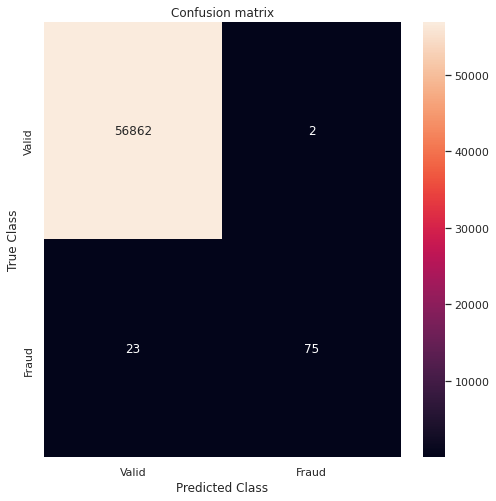

In [20]:
# printing the confusion matrix 
conf_matrix = confusion_matrix(y_test, rfc_preds) 
plt.figure(figsize =(8, 8)) 
sb.heatmap(conf_matrix, xticklabels =['Valid', 'Fraud'], 
           yticklabels = ['Valid', 'Fraud'], annot = True, fmt ="d")
plt.title("Confusion matrix") 
plt.ylabel('True Class') 
plt.xlabel('Predicted Class') 
plt.show() 

In [21]:
print('Training Score :',rfc.score(X_train,y_train))
print('Testing Score :',rfc.score(X_test,y_test))

Training Score : 0.9999956110513727
Testing Score : 0.9995611109160493


In [22]:
#let's shuffle the dataset before getting into undersampling 
data=data.sample(frac=1)
#separate fraud and non fraud transactions 
fraud=data[data.Class==1]
nonfraud=data[data.Class==0][:500]
# create a balanced datafrme of fraud and non fraud transactions and worn on it 
balanced_df = pd.concat([fraud, nonfraud])
# Shuffle dataframe rows
balanced_df= balanced_df.sample(frac=1, random_state=101)
#show 
balanced_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
154684,102572.0,-28.709229,22.057729,-27.855811,11.845013,-18.983813,6.474115,-43.557242,-41.044261,-13.320155,-24.588262,3.481952,-9.128341,-3.008255,0.796580,-2.102299,-5.660366,-13.032785,-5.392349,-0.901041,11.059004,-22.797604,8.316275,5.466230,0.023854,-1.527145,-0.145225,-5.682338,-0.439134,0.01,1
151349,95440.0,1.480694,-1.158445,0.105691,0.937538,-1.206242,0.050644,-0.819359,0.108523,2.491155,-0.297366,1.695191,-1.702282,1.087497,1.459007,-0.793729,0.679805,0.026343,0.784672,-0.402378,0.163321,0.046011,0.014913,0.142414,-0.038062,-0.704318,0.096083,-0.061060,-0.013484,227.14,0
273679,165650.0,-0.118478,0.532651,1.276463,1.138289,-0.403578,0.044344,0.262889,-0.093827,0.051439,-0.075428,-0.613371,0.449462,1.116189,-0.139649,1.832492,-0.993398,0.387410,0.146684,2.605407,0.226752,-0.045416,0.154156,0.285764,-0.070199,-1.081716,-0.255964,0.209761,0.206730,59.99,0
104058,68896.0,-0.384956,1.072912,1.263138,0.014078,0.201696,-0.516398,0.626769,0.072710,-0.378850,-0.552123,-0.012661,-0.064804,-0.035099,-0.374419,1.160355,0.096277,0.294526,-0.571225,-0.448762,0.074233,-0.237452,-0.585672,0.017124,0.019125,-0.237829,0.102003,0.261140,0.094620,3.59,0
116139,74159.0,-1.548788,1.808698,-0.953509,2.213085,-2.015728,-0.913457,-2.356013,1.197169,-1.678374,-3.538650,3.102090,-3.993373,-1.937411,-3.822894,0.830970,-2.475359,-5.211875,-0.413872,0.933262,0.390786,0.855138,0.774745,0.059037,0.343200,-0.468938,-0.278338,0.625922,0.395573,76.94,1


Before Undersampling :
 0    284315
1       492
Name: Class, dtype: int64
________-----________
After Undersampling :
 0    500
1    492
Name: Class, dtype: int64


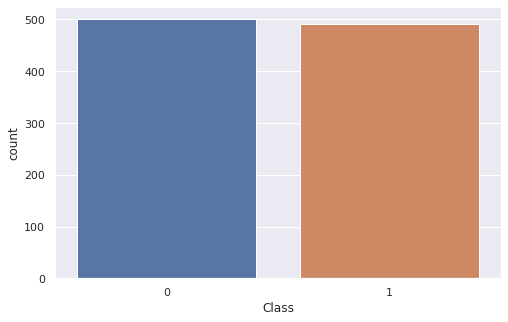

In [23]:
print("Before Undersampling :\n",data.Class.value_counts())
print('________-----________')
print("After Undersampling :\n",balanced_df.Class.value_counts())
sb.countplot(data=balanced_df,x='Class')

In [24]:
balanced_df.shape

(992, 31)

In [25]:
df=balanced_df.copy()
# dividing the X  and the Y  from the balanced dataset 
X_balanced = df.drop(['Class'], axis = 1) 
y_balanced = df["Class"] 
print('X_balanced: Features || y_balanced:Class Labels: \n')
print(X_balanced.shape,y_balanced.shape) 
# getting just the values for the sake of processing  
# (its a numpy array with no columns) 
X_balanced = X_balanced.values 
y_balanced = y_balanced.values 
# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split( X_balanced,y_balanced , test_size = 0.2, random_state = 101) 
print('\n')
print('After Splitting : \n')
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

X_balanced: Features || y_balanced:Class Labels: 

(992, 30) (992,)


After Splitting : 

(793, 30) (199, 30) (793,) (199,)


In [26]:
# Random Forest Classifier (RANDOM FOREST) 
rfc = RandomForestClassifier()
# Decison Tree Classifier 
dt=DecisionTreeClassifier()
# Logistic Regression Classifier
lr=LogisticRegression()
#put those alorithms into a dictionnary 
models={'Random Forest Classifier': rfc,'Decision Tree':dt,'Logistic Regression':lr}
predictions={}
for name,model in models.items():
    print('***********')
    print(f'TRAINING {name} Model ')
    model.fit(X_train,y_train)
    print('FINISHED TRAINING \n')
    print(f'TRAIN SCORE : {model.score(X_train,y_train)}\n')
    print(f'TEST SCORE : {model.score(X_test,y_test)}\n')
    predictions[name] = model.predict(X_test) 
    print(f'DONE WITH {name} MODEL')

***********
TRAINING Random Forest Classifier Model 
FINISHED TRAINING 

TRAIN SCORE : 1.0

TEST SCORE : 0.9346733668341709

DONE WITH Random Forest Classifier MODEL
***********
TRAINING Decision Tree Model 
FINISHED TRAINING 

TRAIN SCORE : 1.0

TEST SCORE : 0.8944723618090452

DONE WITH Decision Tree MODEL
***********
TRAINING Logistic Regression Model 
FINISHED TRAINING 

TRAIN SCORE : 0.9382093316519546

TEST SCORE : 0.9296482412060302

DONE WITH Logistic Regression MODEL


In [27]:
#evaluate the models 
rfc_preds=predictions['Random Forest Classifier']
dt_preds=predictions['Decision Tree']
lr_preds=predictions['Logistic Regression']
for model,preds in predictions.items():
    print(f'{model} RESULTS :\n')
    evaluate(y_test,preds)
    print('*************')  

Random Forest Classifier RESULTS :

****EVALUATIONS METRICS****
Accuracy == 0.93
Precision == 0.97
Recall == 0.9
F1-Score == 0.93
*************
Decision Tree RESULTS :

****EVALUATIONS METRICS****
Accuracy == 0.89
Precision == 0.88
Recall == 0.91
F1-Score == 0.93
*************
Logistic Regression RESULTS :

****EVALUATIONS METRICS****
Accuracy == 0.93
Precision == 0.94
Recall == 0.92
F1-Score == 0.93
*************


In [28]:
# Setup the dataset and preprocess 
pycaret_clf=setup(data=balanced_df,target='Class',train_size=0.8)

,Description,Value
0,session_id,6689
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(992, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [29]:
#let's compare models  
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9407,0.9808,0.9138,0.9660,0.9378,0.8814,0.8849,0.188
lightgbm,Light Gradient Boosting Machine,0.9382,0.9800,0.9036,0.9714,0.9345,0.8763,0.8810,0.279
catboost,CatBoost Classifier,0.9369,0.9844,0.9012,0.9706,0.9332,0.8738,0.8780,9.170
et,Extra Trees Classifier,0.9344,0.9804,0.8884,0.9777,0.9298,0.8688,0.8739,0.463
gbc,Gradient Boosting Classifier,0.9331,0.9808,0.9011,0.9625,0.9297,0.8662,0.8695,0.514
rf,Random Forest Classifier,0.9319,0.9761,0.8987,0.9626,0.9280,0.8638,0.8679,0.561
xgboost,Extreme Gradient Boosting,0.9319,0.9788,0.9061,0.9552,0.9286,0.8637,0.8669,1.821
lr,Logistic Regression,0.9180,0.9637,0.8859,0.9468,0.9139,0.8360,0.8399,0.506
dt,Decision Tree Classifier,0.9143,0.9144,0.9213,0.9082,0.9140,0.8286,0.8301,0.029
qda,Quadratic Discriminant Analysis,0.9079,0.9613,0.8883,0.9239,0.9047,0.8158,0.8181,0.022


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=6689)

In [30]:
# Create the XGBoost Classifier for prediction 
xgboost=create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8875,0.9306,0.8000,0.9697,0.8767,0.7750,0.7871
1,0.9625,1.0000,0.9250,1.0000,0.9610,0.9250,0.9276
2,0.9750,1.0000,1.0000,0.9524,0.9756,0.9500,0.9512
3,0.9241,0.9769,0.9000,0.9474,0.9231,0.8482,0.8493
4,0.9494,0.9724,0.9487,0.9487,0.9487,0.8987,0.8987
5,0.8987,0.9526,0.8718,0.9189,0.8947,0.7973,0.7983
6,0.9494,0.9872,0.9487,0.9487,0.9487,0.8987,0.8987
7,0.9494,0.9968,0.9744,0.9268,0.9500,0.8988,0.8999
8,0.8734,0.9718,0.7949,0.9394,0.8611,0.7463,0.7551
9,0.9494,1.0000,0.8974,1.0000,0.9459,0.8986,0.9032


In [32]:
tuned_xgboost=tune_model(xgboost,n_iter=20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9000,0.9444,0.8250,0.9706,0.8919,0.8000,0.8092
1,0.9875,1.0000,0.9750,1.0000,0.9873,0.9750,0.9753
2,0.9500,1.0000,1.0000,0.9091,0.9524,0.9000,0.9045
3,0.9367,0.9724,0.9250,0.9487,0.9367,0.8734,0.8737
4,0.9241,0.9699,0.9231,0.9231,0.9231,0.8481,0.8481
5,0.9114,0.9532,0.8974,0.9211,0.9091,0.8227,0.8230
6,0.9494,0.9872,0.9487,0.9487,0.9487,0.8987,0.8987
7,0.9620,0.9962,1.0000,0.9286,0.9630,0.9241,0.9268
8,0.9367,0.9705,0.9231,0.9474,0.9351,0.8734,0.8736
9,0.9747,0.9929,0.9487,1.0000,0.9737,0.9493,0.9505


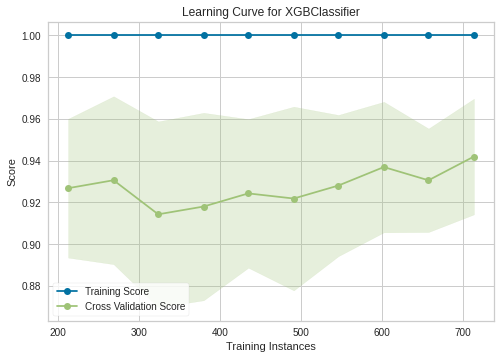

In [33]:
#plot the learning curve 
plot_model(tuned_xgboost,plot='learning')

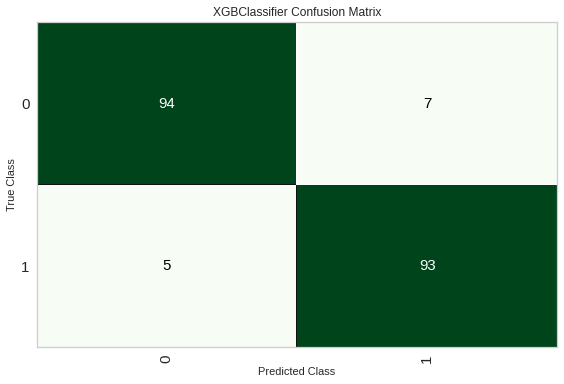

In [34]:
#plot the Confusion Matrix 
plot_model(tuned_xgboost,plot='confusion_matrix')

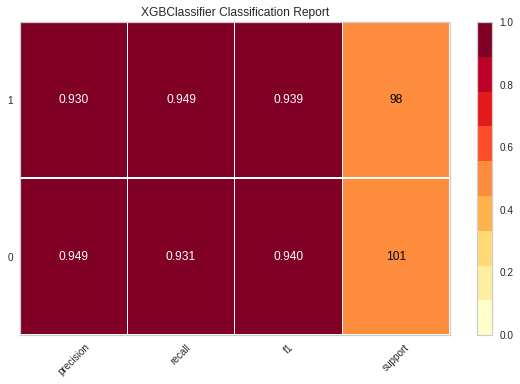

In [35]:
# plot the classification report 
plot_model(tuned_xgboost,plot='class_report')

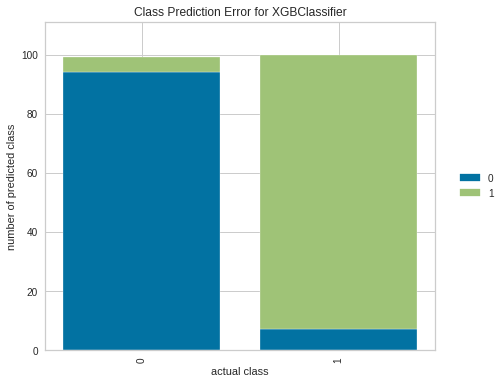

In [36]:
#plot the target prediction error 
plot_model(tuned_xgboost,plot='error')